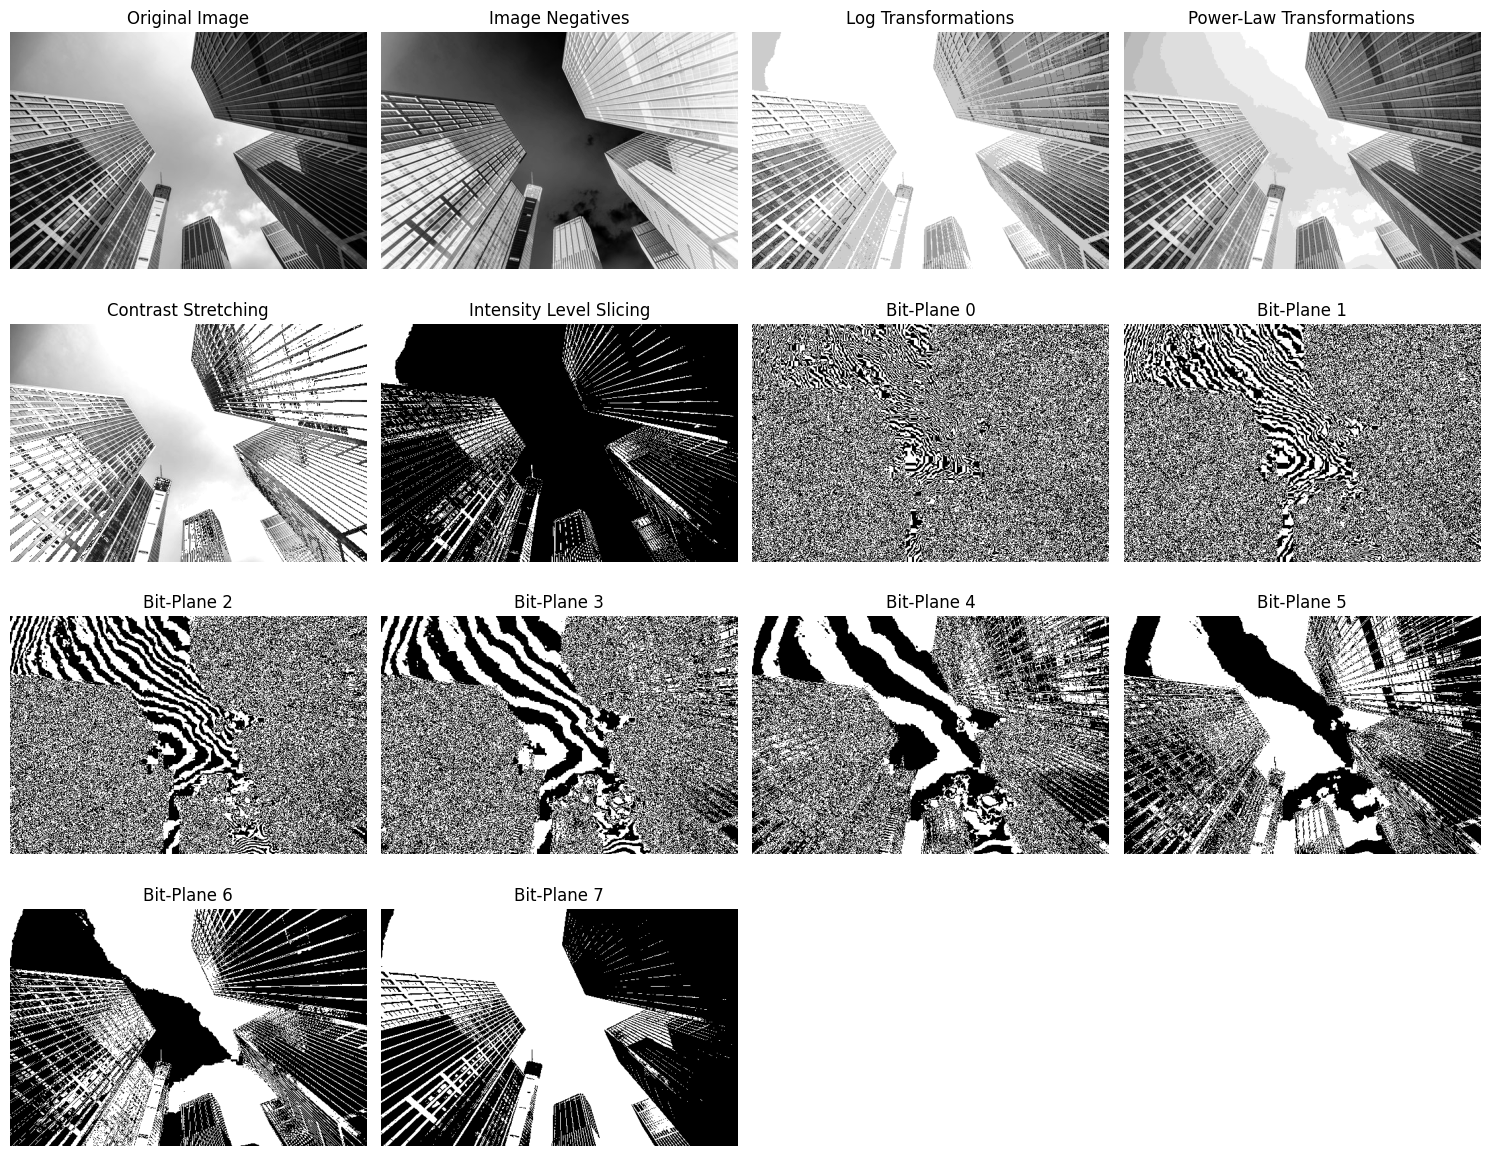

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread(r"F:\CV\build.jpg", cv2.IMREAD_GRAYSCALE)

image = np.clip(image, 0, 255).astype(np.uint8)

neg_image = 255 - image

log_image = np.uint8(np.log1p(image))


gamma = 0.5  # Example gamma value
gamma_image = np.uint8(image ** gamma)

def contrast_stretching(image, a, b, c, d):
    stretched = np.clip((image - a) * ((d - c) / (b - a)) + c, 0, 255)
    return stretched

contrast_image = contrast_stretching(image, 50, 200, 0, 255)

# 2. Intensity Level Slicing
def intensity_level_slicing(image, low, high):
    sliced = np.where((image >= low) & (image <= high), 255, 0)
    return sliced

sliced_image = intensity_level_slicing(image, 100, 150)

# 3. Bit-Plane Slicing
def bit_plane_slicing(image, bit):
    bit_plane = (image >> bit) & 1
    return bit_plane * 255

bit_planes = [bit_plane_slicing(image, i) for i in range(8)]

# Plot all images and transformations
plt.figure(figsize=(15, 12))

# Original Image
plt.subplot(4, 4, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Image Negatives
plt.subplot(4, 4, 2)
plt.imshow(neg_image, cmap='gray')
plt.title('Image Negatives')
plt.axis('off')

# Log Transformations
plt.subplot(4, 4, 3)
plt.imshow(log_image, cmap='gray')
plt.title('Log Transformations')
plt.axis('off')

# Power-Law (Gamma) Transformations
plt.subplot(4, 4, 4)
plt.imshow(gamma_image, cmap='gray')
plt.title('Power-Law Transformations')
plt.axis('off')

# Contrast Stretching
plt.subplot(4, 4, 5)
plt.imshow(contrast_image, cmap='gray')
plt.title('Contrast Stretching')
plt.axis('off')

# Intensity Level Slicing
plt.subplot(4, 4, 6)
plt.imshow(sliced_image, cmap='gray')
plt.title('Intensity Level Slicing')
plt.axis('off')

# Bit-Plane Slicing
for i, bit_plane in enumerate(bit_planes):
    plt.subplot(4, 4, 7 + i)
    plt.imshow(bit_plane, cmap='gray')
    plt.title(f'Bit-Plane {i}')
    plt.axis('off')

plt.tight_layout()
plt.show()
